# Crop and flip

In [3]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import numpy as np

In [4]:
# Den relative sti til ubehandlede billeder
image_folder = os.path.join("..", "..", "Data", "Sample images")

# Tjek for billeder
image_files = glob.glob(os.path.join(image_folder, "*.png")) + \
              glob.glob(os.path.join(image_folder, "*.jpg")) + \
              glob.glob(os.path.join(image_folder, "*.jpeg"))

# Load images into a dictionary {filename: image_object}
images = {os.path.basename(file): Image.open(file) for file in image_files}

# Print for at se om billederne er indlæst
print(f"Loaded {len(images)} images from {image_folder}: {list(images.keys())}")


Loaded 1351 images from ..\..\Data\Sample images: ['00OMSZGW_lower_combined.png', '00OMSZGW_upper_combined.png', '01328DDN_lower_combined.png', '01328DDN_upper_combined.png', '0132CR0A_lower_combined.png', '0132CR0A_upper_combined.png', '01343APK_lower_combined.png', '01343APK_upper_combined.png', '01346914_lower_combined.png', '01346914_upper_combined.png', '013475VT_lower_combined.png', '013475VT_upper_combined.png', '013FHA7K_lower_combined.png', '013FHA7K_upper_combined.png', '013FWKMZ_lower_combined.png', '013FWKMZ_upper_combined.png', '013H18FF_lower_combined.png', '013H18FF_upper_combined.png', '013H3Y8H_lower_combined.png', '013H3Y8H_upper_combined.png', '013JX8W4_lower_combined.png', '013JX8W4_upper_combined.png', '013NUWYR_lower_combined.png', '013NUWYR_upper_combined.png', '013NXHPV_lower_combined.png', '013NXHPV_upper_combined.png', '013NXP1H_lower_combined.png', '013NXP1H_upper_combined.png', '013TGCFK_lower_combined.png', '013TGCFK_upper_combined.png', '013TXGFK_lower_com

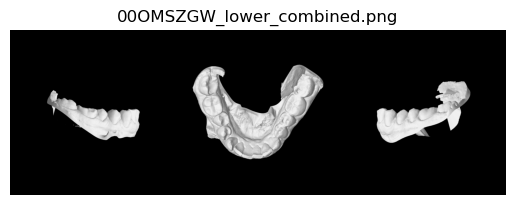

In [4]:
# Display det første billede
if images:
    sample_name, sample_img = next(iter(images.items()))
    plt.imshow(sample_img)
    plt.title(sample_name)
    plt.axis("off")
    plt.show()
else:
    print("No images found. Check the folder path again.")

In [ ]:
# Definer stierne til sample billederne og destinationen for behandlede billeder
source_folder = os.path.join("..", "..", "Data", "Sample images")
output_folder = os.path.join("..", "..", "Data", "Processed_Images")

# Sørg for output folder eksisterer
os.makedirs(output_folder, exist_ok=True)

# Indlæs billeder
image_files = [f for f in os.listdir(source_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))] # f.lower er bare lowercase

# Tjek dimension
width, height = None, None # Initialisering

for file in image_files:
    image_path = os.path.join(source_folder, file) # Mappe og billede/fil
    img = Image.open(image_path) # Åben billede på overstående image_path
    
    if width is None and height is None:
        width, height = img.size  # Dimension af første billeder (For sammenligning med andre)
    else:
        assert img.size == (width, height), f"Image {file} has different dimensions!"

print(f"✅ All images have dimensions: {width}x{height}")

# Opdel billede i 3
split_width = width // 3  # hvert billede får 1/3 af den originale størrelse

for file in image_files:
    image_path = os.path.join(source_folder, file)
    img = Image.open(image_path)
    
    base_name = os.path.splitext(file)[0]
    suffix = base_name.split("_")[-1]  # Extract "lower" or "upper"

    # Crop left, middle, right delene
    left_part = img.crop((0, 0, split_width, height)) # (0, 0, 1024, 1024)
    middle_part = img.crop((split_width, 0, 2 * split_width, height)) # (1024, 0, 2*1024, 1024)
    right_part = img.crop((2 * split_width, 0, width, height)) # (2*1024, 0, 3072, 1024)

    # Flip right billedet
    right_part = right_part.transpose(Image.FLIP_LEFT_RIGHT)

    # Gem cropped billeder med nye navne
    left_part.save(os.path.join(output_folder, f"{base_name}_{suffix}_left.png"))
    middle_part.save(os.path.join(output_folder, f"{base_name}_{suffix}_middle.png"))
    right_part.save(os.path.join(output_folder, f"{base_name}_{suffix}_right.png"))

print(f"✅ Processed {len(image_files)} images and saved to {output_folder}")

✅ All images have dimensions: 3072x1024
✅ Processed 1351 images and saved to ..\..\Modeller\Processed_Images


# Der gik noget galt med navnene

In [ ]:
processed_images_folder = os.path.join("..", "..", "Data", "Processed_Images")

image_files = [f for f in os.listdir(processed_images_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))] # For alting i mappen processed images der slutter på png/jpg/jpeg, smid det i listen

# Loop igennem hvert billde for at fikse navnet
for old_name in image_files:
    new_name = old_name.replace("combined", "")

    new_name = new_name.replace("__", "_")

    # Ingen duplikerede navne
    if old_name != new_name:
        old_path = os.path.join(processed_images_folder, old_name)
        new_path = os.path.join(processed_images_folder, new_name)
        
        os.rename(old_path, new_path)
        print(f"✅ Renamed: {old_name} → {new_name}")

print("🎉 All filenames cleaned and formatted correctly!")


✅ Renamed: 00OMSZGW_lower__left.png → 00OMSZGW_lower_left.png
✅ Renamed: 00OMSZGW_lower__middle.png → 00OMSZGW_lower_middle.png
✅ Renamed: 00OMSZGW_lower__right.png → 00OMSZGW_lower_right.png
✅ Renamed: 00OMSZGW_upper__left.png → 00OMSZGW_upper_left.png
✅ Renamed: 00OMSZGW_upper__middle.png → 00OMSZGW_upper_middle.png
✅ Renamed: 00OMSZGW_upper__right.png → 00OMSZGW_upper_right.png
✅ Renamed: 01328DDN_lower__left.png → 01328DDN_lower_left.png
✅ Renamed: 01328DDN_lower__middle.png → 01328DDN_lower_middle.png
✅ Renamed: 01328DDN_lower__right.png → 01328DDN_lower_right.png
✅ Renamed: 01328DDN_upper__left.png → 01328DDN_upper_left.png
✅ Renamed: 01328DDN_upper__middle.png → 01328DDN_upper_middle.png
✅ Renamed: 01328DDN_upper__right.png → 01328DDN_upper_right.png
✅ Renamed: 0132CR0A_lower__left.png → 0132CR0A_lower_left.png
✅ Renamed: 0132CR0A_lower__middle.png → 0132CR0A_lower_middle.png
✅ Renamed: 0132CR0A_lower__right.png → 0132CR0A_lower_right.png
✅ Renamed: 0132CR0A_upper__left.png → 01

## Flipping

In [ ]:
csv_path = os.path.join("..", "..", "Data", "Labels as of 19-02-2025 (Sample images).csv") # Originale CSV
output_csv_path = os.path.join("..", "..", "Data", "Updated_Labels.csv") # CSV efter behandling
processed_images_folder = os.path.join("..", "..", "Data", "Processed_Images") # Behandlede billeder

# Indlæs csv
df = pd.read_csv(csv_path)
df[["X1", "Y1", "X2", "Y2"]] = df[["X1", "Y1", "X2", "Y2"]].astype(int)

sample_image_file = next(iter(os.listdir(processed_images_folder)))
sample_image_path = os.path.join(processed_images_folder, sample_image_file)

with Image.open(sample_image_path) as img:
    image_width, _ = img.size

print(f"✅ Detected image width: {image_width}")

# Opbevar de opdaterede annotationer
updated_annotations = []

# Løb igennem hver række i den Originale CSV
for _, row in df.iterrows():
    filename, x1, y1, x2, y2 = row["Filename"], row["X1"], row["Y1"], row["X2"], row["Y2"]
    
    # Extract base name (Fjerner "_combined.png")
    base_name = filename.replace("_combined.png", "")

    # Definer nye filnavne (Tilføjer _left.png/_right.png til teksten før _combined.png)
    left_filename = f"{base_name}_left.png"
    right_filename = f"{base_name}_right.png"

    # Append left image (X1, Y1 unchanged)
    updated_annotations.append([left_filename, x1, y1]) # Indsætter en række med f"{base_name}_left.png", X-koordinat, Y-koordinat

    # Benyt original billed dim
    original_image_width = 3072  # Eftersom Original CSV annotering var fra den dimension

    # Flip X2 for right image
    flipped_x2 = (original_image_width - 1) - x2

    updated_annotations.append([right_filename, flipped_x2, y2]) # Indsætter en række med f"{base_name}_right.png", X-koordinat (Flipped), Y-koordinat

# Convert to DataFrame and save
updated_df = pd.DataFrame(updated_annotations, columns=["Filename", "X", "Y"])
updated_df.to_csv(output_csv_path, index=False)

print(f"✅ Updated annotations saved to: {output_csv_path}")

✅ Detected image width: 1024
✅ Updated annotations saved to: ..\..\Modeller\Updated_Labels.csv


Now the right image is flipped so it looks like the left. The flipping of the pixels can be described mathematically with the following formula:

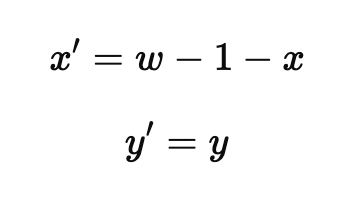

In [46]:
Image.open(r"/Users/casperbakolesen/Documents/Dataprojekt - github/Dataprojekt/Databehandling/crop_og_flip/pixel_flip_formel.png")

Here $w$ is the width of the image. To change the sample labels we still have a problem though. The sample labels are made with an image of 3072x1024 which is composed of 3 smaller 1024x1024 images arranged horizontically. We want to flip the right image, but retain its position in the 3072x1024 image. This means that the formula will not work directly as we have to take this into account. To account for this we just add the x-value of the leftmost pixel in the right image which will always be $2\cdot1024$ in this case.

# Example of image flip:

So for a point e.g
00OMSZGW_lower_combined.png,777,492,2310,487

We first split the csv data getting:

00OMSZGW_lower_left.png,777,492

00OMSZGW_lower_right.png,2310,487 

And we must alter 00OMSZGW_lower_right.png,2310,487 

So we do:

3072-1-2310=761

Thus having the new x-coordinate


# Quick Data Overview

In [ ]:
# Paths
processed_images_folder = os.path.join("..", "..", "Data", "Processed_Images")
csv_path = os.path.join("..", "..", "Data", "Updated_Labels.csv")
output_gif_path = os.path.join("..", "..", "Data", "Annotations_Check.gif")

# Indlæs opdaterede labels
df = pd.read_csv(csv_path)

# Initialize frames for GIF
frames = []

# Loop igennem alle billeder i CSV filen
for _, row in df.iterrows():
    filename, x, y = row["Filename"], row["X"], row["Y"]
    
    image_path = os.path.join(processed_images_folder, filename)
    
    if os.path.exists(image_path):
        img = Image.open(image_path)

        # Plot image med annotatering
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(img)
        ax.scatter(x, y, color='red', s=1, marker='s', label="Annotation")  # Mindste prik der fås
        ax.set_title(filename)
        ax.axis("off")

        fig.canvas.draw()
        image_array = np.array(fig.canvas.buffer_rgba())
        frame = Image.fromarray(image_array)
        frames.append(frame)

        plt.close(fig)

# Save frames as GIF
if frames:
    frames[0].save(output_gif_path, save_all=True, append_images=frames[1:], duration=500, loop=0)
    print(f"✅ GIF saved at: {output_gif_path}")
else:
    print("⚠️ No frames generated. Check file paths!")

✅ GIF saved at: ..\..\Modeller\Annotations_Check.gif
